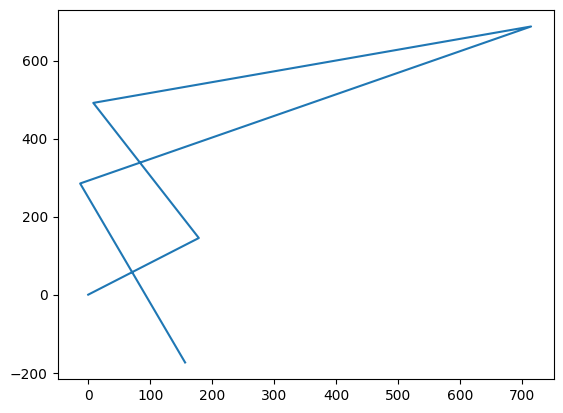

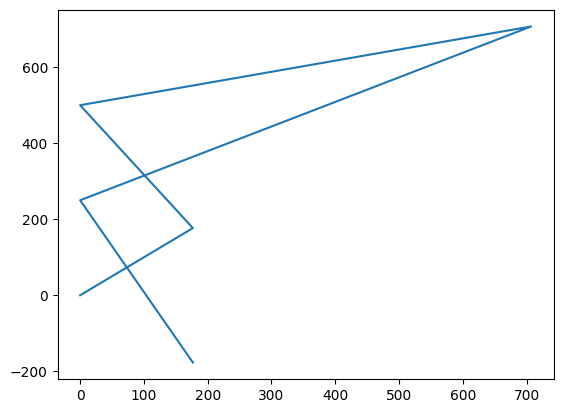

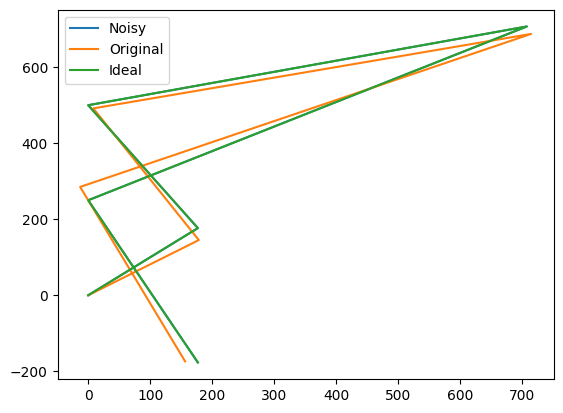

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# 1. Зададим начальное положение робота и среднеквадратические отклонения
initial_position = np.array([0, 0])  # Начальное положение
standard_deviations = np.array([math.radians(2), 15])  # Среднеквадратическое отклонение

# 2. Зададим не менее 5 команд на перемещение робота
commands = [
    {
        "rotation": np.pi/4,
        "movement": 250,
    },
    {
        "rotation": np.pi/2,
        "movement": 500,
    },
    {
        "rotation": np.pi/4,
        "movement": 1000,
    },
    {
        "rotation": np.pi/2,
        "movement": 250,
    },
    {
        "rotation": -np.pi/4,
        "movement": 250,
    }
]

# 3. Построим траекторию движения робота с учетом погрешностей
X = [initial_position[0]]
Y = [initial_position[1]]
ang = []
for command in commands:
    angle = command["rotation"] + random.gauss(0, standard_deviations[0])
    distancex = command["movement"] * np.cos(angle) + random.gauss(0, standard_deviations[1])
    distancey = command["movement"] * np.sin(angle) + random.gauss(0, standard_deviations[1])
    X.append(distancex)
    Y.append(distancey)
    ang.append(angle)

plt.plot(X, Y)
plt.show()

# Траектория без шума
Xn = [initial_position[0]]
Yn = [initial_position[1]]
for command in commands:
    angle = command["rotation"]
    distancex = command["movement"] * np.cos(angle)
    distancey = command["movement"] * np.sin(angle)
    Xn.append(distancex)
    Yn.append(distancey)

plt.plot(Xn, Yn)
plt.show()

# Построим траекторию робота, с зашумленными данными, исходными данными и идеальную траекторию соответственно.
Xid = [initial_position[0]]
Yid = [initial_position[1]]
for command in commands:
    angle = command["rotation"]
    dx = command["movement"] * np.cos(angle)
    dy = command["movement"] * np.sin(angle)
    Xid.append(dx)
    Yid.append(dy)

plt.plot(Xn, Yn)
plt.plot(X, Y)
plt.plot(Xid, Yid)
plt.legend(["Noisy", "Original", "Ideal"])
plt.show()

# 4. Построим фильтр частиц для робота
number_of_particles = 1000  # Число частиц
particles = np.zeros((number_of_particles, 3))
weights = np.ones(number_of_particles) / number_of_particles  # Веса частиц

sorted_indices = np.argsort(weights)
sorted_weights = weights[sorted_indices]

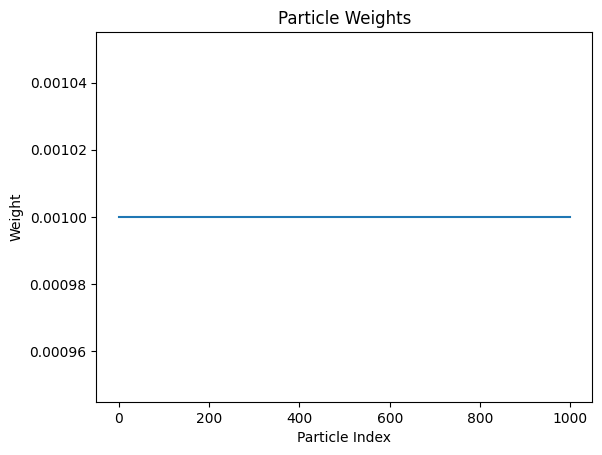

Estimated Position: [1166.29483409 1416.18560594]


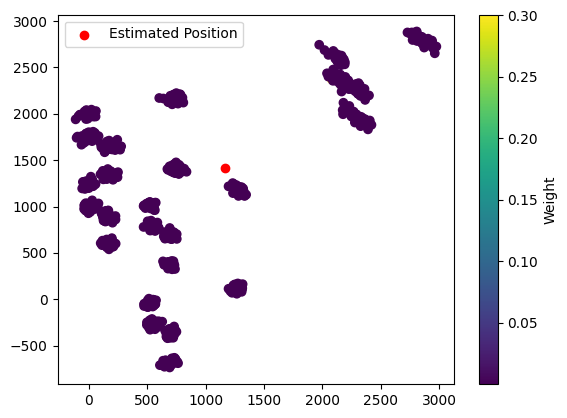

In [7]:
plt.plot(range(number_of_particles), sorted_weights)
plt.xlabel('Particle Index')
plt.ylabel('Weight')
plt.title('Particle Weights')
plt.show()

# 5. Реализуем процесс выборки частиц
normalized_weights = weights / np.sum(weights)  # Нормализуем веса
indices = np.random.choice(range(number_of_particles), size=number_of_particles, p=normalized_weights)
resampled_particles = particles[indices]


# 6. Обновим положение частиц с учетом команд на перемещение робота
new_particles = []
for i in range(number_of_particles):
    command = commands[i % len(commands)]
    angle = command["rotation"] + random.gauss(0, standard_deviations[0])
    distancex = command["movement"] * np.cos(particles[i][2]) + random.gauss(0, standard_deviations[1])
    distancey = command["movement"] * np.sin(particles[i][2]) + random.gauss(0, standard_deviations[1])
    x = particles[i][0] + distancex
    y = particles[i][1] + distancey
    new_particles.append([x, y, angle])

particles = np.array(new_particles)

# 7. Обновим веса частиц
for i in range(min(number_of_particles, len(X))):
    particle = particles[i]
    predicted_position = np.array([particle[0], particle[1]])
    measured_position = np.array([X[i], Y[i]])
    weight = np.linalg.norm(predicted_position - measured_position)
    weights[i] = weight

weights = weights / np.sum(weights)

# 8. Построим финальную оценку положения робота
estimated_position = np.average(particles[:, :2], weights=weights, axis=0)
print("Estimated Position:", estimated_position)

plt.scatter(particles[:, 0], particles[:, 1], c=weights, cmap='viridis')
plt.colorbar(label='Weight')
plt.scatter(estimated_position[0], estimated_position[1], color='red', label='Estimated Position')
plt.legend()
plt.show()
